# Introduction to Scikit-Learn

0. Scikit-Learn workflow
1. Getting Data Ready
2. Choose right estimator/algorithm/ Model
3. Fitting Model and use to make prediction on our data
4. Evaluating Model
5. Improve through experiments
6. Improve Model
7. Save and load a trained model
8. Putting it all together

## Scikit-Learn Workflow

In [2]:
topics = [
"0. Scikit-Learn workflow",
"1. Getting Data Ready",
"2. Choose right estimator/algorithm/ Model",
"3. Fitting Model and use to make prediction on our data",
"4. Evaluating Model",
"5. Improve through experiments",
"6. Improve Model",
"7. Save and load a trained model",
"8. Putting it all together"]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (feature variable)
X = heart_disease.drop("target", axis = 1)

# Creat Y (labels)
Y = heart_disease["target"]

# 2. Choose the right model and hyperparameter

In [6]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier - Classifier machine ML model

clf = RandomForestClassifier()

# We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. Fit the Model to the Training Data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
clf.fit(X_train, Y_train);

In [9]:
# Making Prediction
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3


In [10]:
Y_preds = clf.predict(X_test)
Y_preds

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [11]:
Y_test

129    1
258    0
28     1
144    1
15     1
      ..
217    0
248    0
241    0
285    0
160    1
Name: target, Length: 61, dtype: int64

# 4. Evaluate the model

In [12]:
clf.score(X_train, Y_train)

1.0

In [13]:
clf.score(X_test, Y_test)

0.7868852459016393

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [15]:
confusion_matrix(Y_test, Y_preds)

array([[22,  7],
       [ 6, 26]], dtype=int64)

In [16]:
accuracy_score(Y_test, Y_preds)

0.7868852459016393

# 5. Improve Model

In [17]:
# Try different Amount of n_estimation
np.random.seed(12)
for i in range(10, 100,10):
    print(f"Trying model with {i} estimators....")
    
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")

Trying model with 10 estimators....
Model accuracy on test set: 75.41%
Trying model with 20 estimators....
Model accuracy on test set: 78.69%
Trying model with 30 estimators....
Model accuracy on test set: 81.97%
Trying model with 40 estimators....
Model accuracy on test set: 75.41%
Trying model with 50 estimators....
Model accuracy on test set: 77.05%
Trying model with 60 estimators....
Model accuracy on test set: 77.05%
Trying model with 70 estimators....
Model accuracy on test set: 77.05%
Trying model with 80 estimators....
Model accuracy on test set: 75.41%
Trying model with 90 estimators....
Model accuracy on test set: 75.41%


# 6. Save model and load it

In [18]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))
#wb - write binary

In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
#rb - read binary
loaded_model.score(X_test, Y_test)

0.7540983606557377

# 1. Getting data ready  to use for ML
Three things we have to do:
1. Split the data into features and labels (usually 'X' & 'y')
2. Filling, imputing, disregarding the missing values
3. Converting non-numeric to numerical (feacture learning)

In [20]:
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [21]:
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Making sure it's all numerical

In [23]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Remove the punctuation from price column
car_sales["Price"] = car_sales["Price"].replace("[$,.]","", regex=True).astype(int)
car_sales["Price"] = car_sales["Price"] / 100

In [27]:
# Split data X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
# Build ML model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.scoe(X_test, y_test)

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,153.23
1,BMW,Blue,192714,5,199.43
2,Honda,White,84714,4,283.43
3,Toyota,White,154365,4,134.34
4,Nissan,Blue,181577,3,140.43
...,...,...,...,...,...
995,Toyota,Black,35820,4,320.42
996,Nissan,White,155144,3,57.16
997,Nissan,Blue,66604,4,315.70
998,Honda,White,215883,4,40.01


In [180]:
#Turn catehories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformer

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot', OneHotEncoder(),
                                 ['Make', 'Colour', 'Doors'])])

In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,153.23
1,BMW,Blue,192714,5,199.43
2,Honda,White,84714,4,283.43
3,Toyota,White,154365,4,134.34
4,Nissan,Blue,181577,3,140.43
...,...,...,...,...,...
995,Toyota,Black,35820,4,320.42
996,Nissan,White,155144,3,57.16
997,Nissan,Blue,66604,4,315.70
998,Honda,White,215883,4,40.01


In [33]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [34]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,153.23
1,BMW,Blue,192714,5,199.43
2,Honda,White,84714,4,283.43
3,Toyota,White,154365,4,134.34
4,Nissan,Blue,181577,3,140.43
...,...,...,...,...,...
995,Toyota,Black,35820,4,320.42
996,Nissan,White,155144,3,57.16
997,Nissan,Blue,66604,4,315.70
998,Honda,White,215883,4,40.01


In [35]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
model.score(X_test, y_test)

0.3241845340240542

## 1.2 What if there were missing values?
1. Fill them with some values(Imputation)
2. Remove the samples with data altogether

In [37]:
# Importing data
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head(6)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0


In [38]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [39]:
# Assigning X & y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]


In [181]:
# Transforming categorical to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_columns)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

<950x17 sparse matrix of type '<class 'numpy.float64'>'
	with 4750 stored elements in Compressed Sparse Row format>

In [41]:
pd.DataFrame(transformed_X).head(3)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


### Filling missing values with Pandas

In [42]:
# Filling the "make" column

car_sales_missing["Make"].fillna("missing", inplace = True)

car_sales_missing["Colour"].fillna("missing", inplace = True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

car_sales_missing["Doors"].fillna(4, inplace = True)

# Remove rows with missing price value
car_sales_missing.dropna(inplace = True)

In [43]:
car_sales_missing.isna().sum(), len(car_sales_missing)

(Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64,
 950)

In [44]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [45]:
# Transforming categorical to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_columns)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Filling missing data and transforming categorical data with Scikit-Learn

The main takeaways:
1. 
Split your data first (into train/te)
2. )
Fill/transform the training set and test sets separately

In [46]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
# Check missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
#Splitting data

X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [50]:
# len(X_train), len(X_test), len(y_train), len(t_test)

In [51]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [52]:

# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum(), len(car_sales_filled_test), len(car_sales_filled_train)


(Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64,
 190,
 760)

In [53]:

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [54]:
pd.DataFrame(transformed_X_train)[0]

0        (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
1        (0, 3)\t1.0\n  (0, 8)\t1.0\n  (0, 12)\t1.0\n...
2        (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
3        (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
4        (0, 1)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...
                             ...                        
755      (0, 3)\t1.0\n  (0, 10)\t1.0\n  (0, 12)\t1.0\...
756      (0, 0)\t1.0\n  (0, 6)\t1.0\n  (0, 13)\t1.0\n...
757      (0, 3)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
758      (0, 1)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...
759      (0, 1)\t1.0\n  (0, 10)\t1.0\n  (0, 12)\t1.0\...
Name: 0, Length: 760, dtype: object

In [55]:
y_test

203    10547.0
979    17940.0
729    12950.0
838     5905.0
919     9826.0
        ...   
625    10377.0
33      9780.0
31      6866.0
746    16705.0
305    18375.0
Name: Price, Length: 190, dtype: float64

In [56]:

# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [57]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

## 2. Choosing right estimator/algorithm for our problem

NOTE: 
* Sklearn refers to ML models, algorithms as estimators
* Classification problem - predicting a category(Heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as Classification estimator
* Regression problem - predicting a number (selling price of a car)

Sklean Map - https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a ML model for regression problem

Let's use the California Housing Dataset
https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html

In [58]:
# Get California Housing Dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [59]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [60]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [61]:
# import algorthm
from sklearn.linear_model import Ridge

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"] # median house price in $1000,000

#Split into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instanstiate and fit the model(on the training set)
model = Ridge()
model.fit(X_train, y_train)

# instanstiate and fit the model(on the test set)
model.score(X_test, y_test)

0.5783803894004866

In [62]:
from sklearn.svm import SVR

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"] # median house price in $1000,000

#Split into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instanstiate and fit the model(on the training set)
model = SVR()
model.fit(X_train, y_train)

# instanstiate and fit the model(on the test set)
model.score(X_test, y_test)

-0.02394584005104239

In [63]:
from sklearn.linear_model import Lasso

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"] # median house price in $1000,000

#Split into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instanstiate and fit the model(on the training set)
model = Lasso()
model.fit(X_train, y_train)

# instanstiate and fit the model(on the test set)
model.score(X_test, y_test)

0.2857184901384596

Ensembles model - It is a combination smaller model to try and make better prediction then single model

Ensembles model doc - https://scikit-learn.org/stable/modules/ensemble.html

In [64]:
# import RanfomForestRegressor model class form the ensemle module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"] # median house price in $1000,000

#Split into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Crete random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [65]:
## 2.2 Picking a ML model for a classification model

heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map it say use LinearSVC

In [66]:
# import the RandomForestClassifies
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instatoate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [67]:
# import the RandomForstClassifirest estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instatoate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassfier
clf.score(X_test, y_test)

0.8524590163934426

In [68]:
topics

['0. Scikit-Learn workflow',
 '1. Getting Data Ready',
 '2. Choose right estimator/algorithm/ Model',
 '3. Fitting Model and use to make prediction on our data',
 '4. Evaluating Model',
 '5. Improve through experiments',
 '6. Improve Model',
 '7. Save and load a trained model',
 '8. Putting it all together']

##  3. Fitting Model and use to make prediction on our data

### 3.1 Fitting the data to the model

In [69]:
# import the RandomForstClassifirest estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


#Instatoate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassfier
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make prediction using ML model
2 ways to predict 
1. predict()
2. predict_proba()

In [70]:
# Use a trained model to make prediction
# clf.predict(np.array([1, 6, 5 ,3 ,5])) # it does not work

In [71]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
# Compare predioction to truth label to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [74]:
clf.score(X_test, y_test)

0.8524590163934426

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make prediction with predict_proba()

In [76]:
# predict_proba() returns the probabily of classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [77]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [78]:
np.array(y_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

'predict()' can also be used for regression model

In [79]:
housing_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [80]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [81]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [82]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [83]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [84]:
absolute_differences = np.abs(y_test - y_preds)
total_absolute_difference = np.sum(absolute_differences)
mae = total_absolute_difference / len(y_test)
mae

0.32659871732073664

## 4. Evaluating a ML model

Three ways to evaluate Scikit-Learn model/ estimator

1. Estimator's built in  'score()' method
2. The 'scoring()' parameter
3. Problem specific metric function

Read more: https://scikit-learn.org/1.5/modules/model_evaluation.html



### 4.1 Evaluating model with the score method

In [85]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Create a train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Creat a classfier model
model = RandomForestClassifier(n_estimators = 5)

# Fit classifier to training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [86]:
model.score(X_train, y_train)

0.9834710743801653

In [87]:
model.score(X_test, y_test)

0.8360655737704918

In [88]:
# trying score() for regression dataset

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X & y
X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"]

# Create a train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Creat a classfier model
model = RandomForestRegressor(n_estimators = 100)

# Fit classifier to training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [89]:
model.score(X_train, y_train)

0.9736801960414609

In [90]:
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the scoring parameter

In [91]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Create a train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Creat a classfier model
model = RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train, y_train);

In [92]:
model.score(X_test, y_test)

0.8524590163934426

In [93]:
cross_val_score(model, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [94]:
cross_val_score(model, X, y, cv = 5).mean()

0.8183606557377049

In [95]:
cross_val_score(model, X, y, cv = 10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn .ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

model = RandomForestClassifier()
cross_val_score = cross_val_score(model, X, y, cv = 5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [97]:
np.mean(cross_val_score)

0.8248087431693989

In [98]:
print(f"Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validation Accuracy: 82.48%


**Area under the receiver operating charateristic curve(AUC/ ROC)**
* Area under curve(AUC)
* ROC curve
ROC curves are a comparison of model's true positive rate(tpr) versus and model's false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model prdicts 0 when truth is 0
* False negative = model predicts 0 when truch is 1

In [99]:
# Create X_test , etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [100]:
from sklearn.metrics import roc_curve

# Fit the model
model.fit(X_train, y_train)

# Make predictions with probability
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [101]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [102]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rated
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

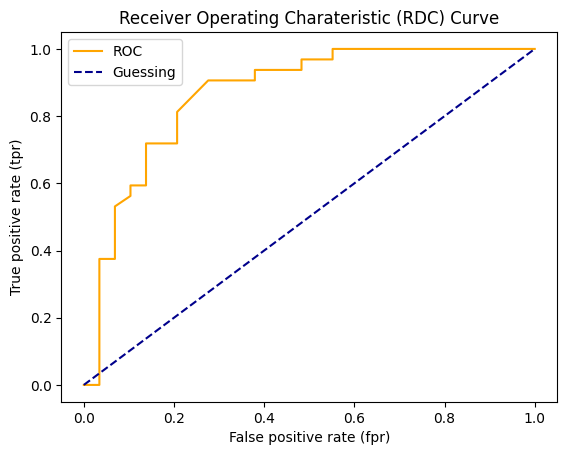

In [103]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plt line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing")

#Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charateristic (RDC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [104]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

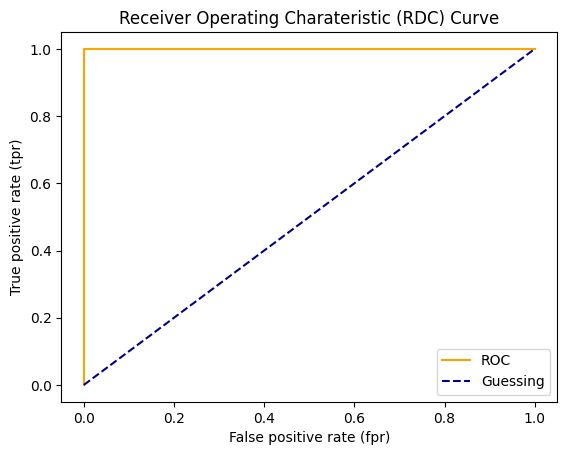

In [105]:
# Plot perfect ROC curve ad AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [106]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
-- A confusion matirc is a quick way to compare labels a model predicts and the actual lavel it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [107]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [108]:
# Visualize confusion matrix
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [109]:
import sys
!conda install --yes --prefix (sys.prefix) seaborn


EnvironmentLocationNotFound: Not a conda environment: F:\Bhavesh\CODES\Python\ANACONDA\ZTM\ML_Begins\(sys.prefix)



<Axes: >

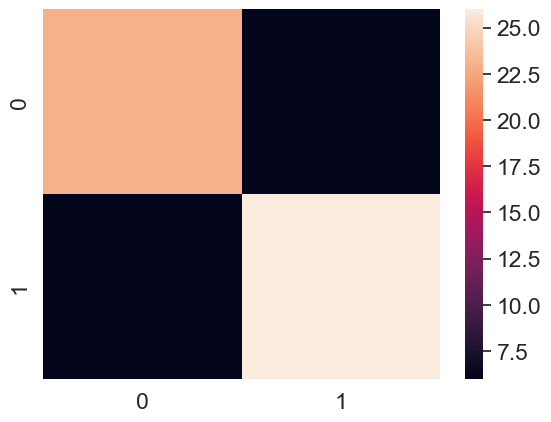

In [110]:
# Make our confusion matrix with seaborn haetmap
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

## Creating a confusion matric using scikit-learn
To use the new methods of creating a confusion matric with Scikit-Learn you willneed skilearn version 1.0+

In [111]:
import sklearn
sklearn.__version__

'1.5.0'

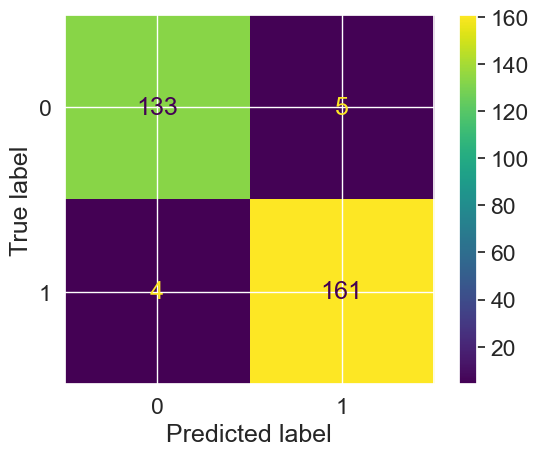

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf , X = X, y = y)

In [113]:
# ConfusionMatixDisplay.from_prediction(y_true = y_test,y_)

# Classification Report

In [114]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_preds))

In [115]:
# Where precision and recall become valuanble
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(10000) # model predicsts every case as 0 

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True,
                                  zero_division = 0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluaiotn metrics
Model evaluation metrics documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html#regression-metrics

Subtopics
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


In [116]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
model.score(X_test, y_test)

0.8065734772187598

In [118]:
y_test.mean()

2.0550030959302323

In [119]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [120]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [121]:
r2_score(y_true = y_test,
        y_pred = y_test_mean)

0.0

In [122]:
y_pred = model.predict(X_test)

In [123]:
r2_score(y_true = y_test,
        y_pred = y_test_mean)

0.0

**Mean Absolute Error (MAE)**
MAE is the average of the absoute differences between prediction and actual values.
It gives you an idea of how wrong your models predictions are


In [124]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [125]:
# Manually getting MAE
mae2 = np.mean(np.abs(y_preds - y_test))
mae2

0.32659871732073664

In [126]:
df = pd.DataFrame(data = {"actual_values":y_test,
                         "predicted_values": y_pred})
df["differece"] = df["predicted_values"] - df["actual_values"]
df

,actual_values,predicted_values,differece
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [127]:
# MAE using formula and differences
np.abs(df["differece"]).mean()

0.32659871732073664

**Mean Squared Error (MSE)** 
MSE is the mean of the square of the errors beteween actual and predicted values

In [128]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [129]:
np.square(df["differece"]).mean()

0.2534678520824551

In [130]:
df["squared_differeces"] = np.square(df["differece"])
df.head()

,actual_values,predicted_values,differece,squared_differeces
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


### Machine Learning Model Evaluation
**Classification Model Evaluation Metrics/Techniques**

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an

**Which classification metric should you use?**

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification mod

**Regression Model Evaluation Metrics/Techniques**

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger erro**s).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the f
* Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions) - https://scikit-learn.org/stable/modules/model_evaluation.html

* Beyond Accuracy: Precision and Recall by Will Koehrsen
https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

* Beyond Accuracy: Precision and Recall by Will Koehrsen
https://stackoverflow.com/a/37861832

### Evaluating Model with cross validation and scoring parameter 

### 4.2.3 Finally using scoring parameter

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [132]:
np.random.seed(42)

# Cross-validation acccuracy

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
# if scoring = None, estimator defaul scoring evaluation metric is used (accuracy for classification model )  
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [133]:
# Cross validated accuracy 
print (f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

The cross-validated accuracy is: 82.480874%


In [134]:
np.random.seed(42)

# Cross-validation acccuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [135]:
print (f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

The cross-validated accuracy is: 82.480874%


In [136]:
# Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [137]:
print (f"The cross-validated accuracy is: {np.mean(cv_precision)*100:2f}%")

The cross-validated accuracy is: 83.295473%


In [138]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [139]:
print (f"The cross-validated accuracy is: {np.mean(cv_recall)*100:2f}%")

The cross-validated accuracy is: 85.454545%


Let's see scoring parameter being using for a regression problem

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"]

model = RandomForestRegressor(n_estimators = 100)

In [141]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 3, scoring = None)
np.mean(cv_r2)

0.6545458023124507

In [142]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [143]:
# Mean squared error 
cv_mae = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_squared_error")
np.mean(cv_mae)

-0.4626304189468596

In [144]:
# Mean absolute error 
cv_mae = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [145]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

## 4.3 Using different evaluation metrics as Scikit-Learn fuction 

The 3rd way to evalueate sckit-learn machine learning models / estimaors is to using sklearn.metrics -
https://scikit-learn.org/1.5/api/sklearn.metrics.html#module-sklearn.metrics

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Cretae X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make prdiction 
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")

print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")

print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")

print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")

print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [147]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Cretae X & y
X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make prdiction 
y_preds = model.predict(X_test)

# # Evaluate model using evaluation functions
print("Regression metrics on the test set")

print(f"R2 score: {r2_score(y_test, y_preds)}")

print(f"MAE score: {mean_absolute_error(y_test, y_preds)}")

print(f"MSE score: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE score: 0.32659871732073664
MSE score: 0.2534678520824551


In [148]:
topics

['0. Scikit-Learn workflow',
 '1. Getting Data Ready',
 '2. Choose right estimator/algorithm/ Model',
 '3. Fitting Model and use to make prediction on our data',
 '4. Evaluating Model',
 '5. Improve through experiments',
 '6. Improve Model',
 '7. Save and load a trained model',
 '8. Putting it all together']

## 5. Improving a model

First prediction = baseline predictions
Fires model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective
* Is there a better model can we use?
* Could we improve the current model?

#### Parameters VS Hyperparameters
Parameters - models find pattern in data
Hyperparameter - Setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly wiht RandomSearchCV
3. Exhaustively with GridSearchCV

In [149]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [150]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make three sets -> Training, Validation and Test

We're going to try and adjust
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [151]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1": round(f1, 2) }
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1: {f1 * 100:.2f}%")

    return metric_dict

In [152]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuggle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X & y 
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 30% of data 

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline prediction
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [153]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 10)
clf_2.fit(X_train, y_train)

# Make predictionm with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 84.00%
Recall: 84.00%
F1: 84.00%


### 5.2 Hyperparmeter tunning with RandomizedSearchCV

In [155]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 1000, 1200],
       "max_depth" : [None, 5, 10, 20, 30],
       "max_features" : ["sqrt", "log2", None],
       "min_samples_split" : [2, 4, 6],
       "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

# Split X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create model
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10 , # number of models to try
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV verion of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 1000,
                                                         1200]},
                   verbose=2)

In [156]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [157]:
# Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the prediction
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 83.61%
Precision: 78.12%
Recall: 89.29%
F1: 83.33%


### 5.3 Hyperparameter tuning with GridSearchCV


In [158]:
grid

{'n_estimators': [10, 100, 200, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [159]:
grid_2 = {"n_estimators":[100, 200, 500],
       "max_depth" : [None],
       "max_features" : ["sqrt", "log2"],
       "min_samples_split" : [6],
       "min_samples_leaf" : [1, 2]}

In [160]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create model
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)

# Fit the GridSearchCV verion of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [161]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [162]:
# Make prediction with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the prediction
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%


Let's compare out different models metrics

<Axes: >

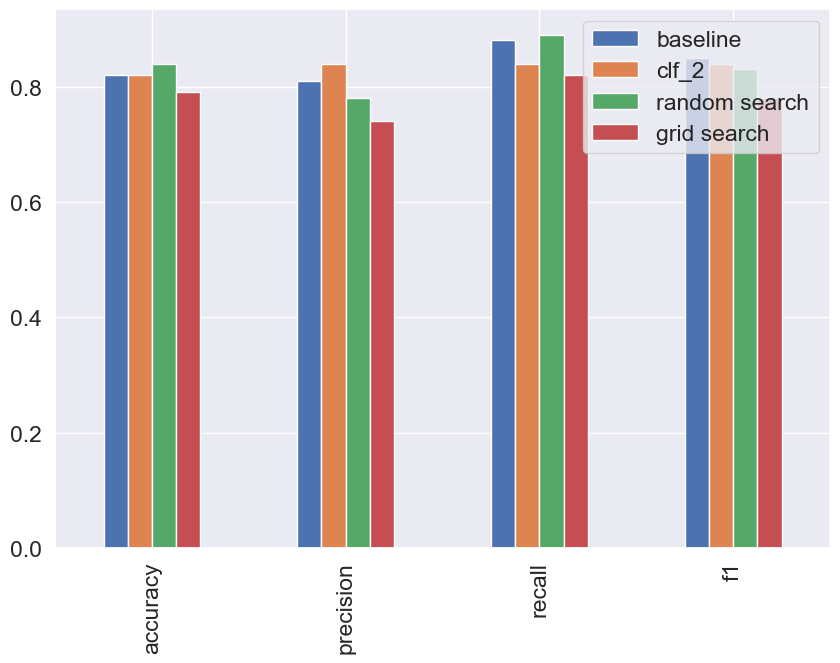

In [163]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize = (10, 7))

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning model
1. With Python's pickle module
2. With the joblib module

**Pickle**

In [164]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("model\gs_random_forest_model_1.pkl","wb"))

In [165]:
# Load a saved model
loaded_pickle_model = pickle.load(open("model\gs_random_forest_model_1.pkl", "rb"))

In [166]:
# Make the predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**joblib**

In [167]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename = "model\gs_random_forest_model_2.pkl")

['model\\gs_random_forest_model_2.pkl']

In [168]:
# Import a saved joblib model
loaded_joblib_model = load(filename = "model\gs_random_forest_model_2.pkl")

In [169]:
# Make and evalute joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together
**Using Pipeline** - https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html

In [170]:
data = pd.read_csv("Data/car-sales-extended-missing-data.csv")
data.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [172]:
data.shape

(1000, 5)

In [173]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [174]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [175]:

data["Doors"].fillna(4, inplace = True)

Steps we want to do (all in one cell):
1. Fill the missing data
2. Covert data to numbers
3. Build ML model on the data

In [176]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows wtih missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace = True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy ="constant", fill_value= "missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy= "constant", fill_value=4))
    ])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
    ])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ])

# Creating a preprocesssing and modelling pipeling
model = Pipeline(steps = [("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])

#Split data
X = data.drop("Price", axis = 1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [177]:
# Use GridSearchCV with our regression Pipeline

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [178]:
gs_model.score(X_test, y_test)

0.2848784564026805

In [179]:
topics

['0. Scikit-Learn workflow',
 '1. Getting Data Ready',
 '2. Choose right estimator/algorithm/ Model',
 '3. Fitting Model and use to make prediction on our data',
 '4. Evaluating Model',
 '5. Improve through experiments',
 '6. Improve Model',
 '7. Save and load a trained model',
 '8. Putting it all together']